# Data Preprocessing and Cleaning

Data Source: [Data.gov](https://catalog.data.gov/dataset/nypd-calls-for-service) a non-federal dataset for public use. 
License: City of New York - NYC.gov see [Terms of Use](https://www.nyc.gov/home/terms-of-use.page)

Install required libraries using ****"pip install library_name"****, set environment variables and import the packages

In [1]:
import os #module used to provide a way of utilizing operating system dependent functionality like reading or setting environments 
import tempfile # module used for creating temporary storage locations 
os.environ["MPLCONFIGDIR"] = tempfile.gettempdir() # sets the MPLCONFIGDIR environment variable to the path returned by tempfile for Maatplotlib to store its config files

This can be particularly useful in scenarios where the user does not have the permission to write to the default Matplotlib configuration directory, or when you want to avoid cluttering the user's home directory with Matplotlib configuration files. It's also beneficial in a multi-user environment or in situations where you want to ensure that Matplotlib's configuration does not persist between program executions.

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

#### 1. Review Data Type(s): 
Inspect and ensure that each column is of the correct data type 
#### 2. Handle Missing Values:
Identify missing values and decide on a strategy for handling them (e.g., imputation or removal).
#### 3. Remove Duplicates:
Check for and remove any duplicate records to ensure data integrity.

In [3]:
# Import and load the dataset using Padas to store as df
nypdData = '/home/jupyter-raphrivers/Datasets/RAW/NYPD_Calls_for_Service__Year_to_Date_.csv'
df = pd.read_csv(nypdData)

After reading the dataset, verify the fields and records. Preview the dataframe, identify and correct errors, inconsistencies, and missing information in a dataset to improve its quality and reliability for analysis. Ensure that each column is of the correct data type (e.g., convert object timestamps to datetime, integers, float etc.). Check for and fill or remove NaN or null values to ensure data integrity.

In [4]:
# Preview data frame displaying all columns
pd.set_option('display.max_columns', None)
df.head()

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
0,91250176,01/01/2023,12/31/2022,23:24:39,67.0,BROOKLYN,PATROL BORO BKLYN SOUTH,1001878,175994,53I,VEHICLE ACCIDENT: INJURY,Non CIP,01/01/2023 01:08:21 AM,01/01/2023 01:09:57 AM,NaN,01/01/2023 01:57:44 AM,40.649730,-73.936475
1,91250180,01/01/2023,12/31/2022,23:24:47,75.0,BROOKLYN,PATROL BORO BKLYN NORTH,1017204,180778,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2023 12:38:00 AM,01/01/2023 12:38:34 AM,01/01/2023 12:44:33 AM,01/01/2023 01:45:21 AM,40.662817,-73.881221
2,91250681,01/01/2023,12/31/2022,23:55:56,114.0,QUEENS,PATROL BORO QUEENS NORTH,1008573,217117,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,01/01/2023 12:01:26 AM,01/01/2023 12:06:18 AM,NaN,01/01/2023 12:06:27 AM,40.762587,-73.912199
3,91250683,01/01/2023,12/31/2022,23:55:59,66.0,BROOKLYN,PATROL BORO BKLYN SOUTH,993234,161780,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,01/01/2023 12:01:34 AM,01/01/2023 12:37:14 AM,01/01/2023 01:09:32 AM,01/01/2023 01:21:14 AM,40.610729,-73.967644
4,91250700,01/01/2023,12/31/2022,23:57:08,115.0,QUEENS,PATROL BORO QUEENS NORTH,1014264,211852,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2023 12:01:29 AM,01/01/2023 12:14:28 AM,01/01/2023 12:21:59 AM,01/01/2023 01:24:22 AM,40.748119,-73.891679


In [5]:
# See the total number of Columns and Rows in the dataset
print('Rows: ', df.shape[0])
print('Columns: ', df.shape[1])

Rows:  7050127
Columns:  18


In [6]:
# convert columns title to lowerccase
df.columns = df.columns.str.lower()

In [7]:
# Check for null or missing values in each column
df.isnull().sum()

cad_evnt_id            0
create_date            0
incident_date          0
incident_time          0
nypd_pct_cd            4
boro_nm                0
patrl_boro_nm          0
geo_cd_x               0
geo_cd_y               0
radio_code             0
typ_desc               0
cip_jobs               0
add_ts                 0
disp_ts                0
arrivd_ts        1503133
closng_ts             20
latitude               0
longitude              0
dtype: int64

In [8]:
# Now that we have seen missing values in some columns. Let's check the number of entries in the arrivd_ts column
len(df['arrivd_ts'].value_counts())

5055189

In [9]:
# Check the number of available timestamp entries in the closng_ts coloumn
len(df['closng_ts'].value_counts())

6265913

In [10]:
# Let check the percentage of missing values to determine missing values handling strategy i.e. if we should drop it, fill or not
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

arrivd_ts        21.320651
closng_ts         0.000284
nypd_pct_cd       0.000057
cad_evnt_id       0.000000
typ_desc          0.000000
latitude          0.000000
disp_ts           0.000000
add_ts            0.000000
cip_jobs          0.000000
radio_code        0.000000
create_date       0.000000
geo_cd_y          0.000000
geo_cd_x          0.000000
patrl_boro_nm     0.000000
boro_nm           0.000000
incident_time     0.000000
incident_date     0.000000
longitude         0.000000
dtype: float64

In [11]:
# let check how the NaN cells are distributed
df_nan = df[['arrivd_ts','closng_ts']]
df_nan.apply(pd.Series.value_counts)

,arrivd_ts,closng_ts
01/01/2023 01:00:00 PM,2.0,NaN
01/01/2023 01:00:01 AM,NaN,1.0
01/01/2023 01:00:02 PM,NaN,1.0
01/01/2023 01:00:05 PM,1.0,NaN
01/01/2023 01:00:06 PM,NaN,1.0
...,...,...
12/31/2023 12:59:55 PM,NaN,2.0
12/31/2023 12:59:56 AM,NaN,1.0
12/31/2023 12:59:56 PM,1.0,NaN
12/31/2023 12:59:58 AM,2.0,NaN


In [12]:
# Convert the timestamp objects column to datetime 
# Note! There may be ambiguous date strings that may throw a dateutil warning. Ensure to use format parameter to overcome this. 
df['add_ts'] = pd.to_datetime(df['add_ts'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['disp_ts'] = pd.to_datetime(df['disp_ts'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['arrivd_ts'] = pd.to_datetime(df['arrivd_ts'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['closng_ts'] = pd.to_datetime(df['closng_ts'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [13]:
# Perform forward and backward fill to preserve the temporal order of observations, making them suitable for time series with consistent intervals.
df['arrivd_ts'].ffill(inplace=True)
df['arrivd_ts'].bfill(inplace=True)
df['closng_ts'].ffill(inplace=True)
df['closng_ts'].bfill(inplace=True)

Now let's convert all the remaining time stamp columns to date time types

In [14]:
# Convert create date, incident date, and incident time columns to datetime format, month, day, and year 
df['create_date'] = pd.to_datetime(df['create_date'], format='%m/%d/%Y')
df['incident_date'] = pd.to_datetime(df['incident_date'], format='%m/%d/%Y')
df['incident_time'] = pd.to_datetime(df['incident_time'], format='%H:%M:%S').dt.time

In [15]:
# Extract day, day of week, month, year from incident_date column and assign them into different columns
df['day_of_month'] = df['incident_date'].dt.day
df['day_of_week'] = df['incident_date'].dt.day_name()
df['month'] = df['incident_date'].dt.month_name()
df['year'] = df['incident_date'].dt.year

In [35]:
pd.set_option('display.max.columns', None)
df.head()

,cad_evnt_id,create_date,incident_date,incident_time,nypd_pct_cd,boro_nm,geo_cd_x,geo_cd_y,radio_code,cip_jobs,add_ts,disp_ts,arrivd_ts,closng_ts,latitude,longitude,day_of_month,day_of_week,month,year,incident_type,incident_desc,neighborhood,response_time_mins,incident_duration,incident_datetime
0,91250176,2023-01-01,2022-12-31,23:24:39,67.0,Brooklyn,1001878,175994,53I,Non CIP,2023-01-01 01:08:21,2023-01-01 01:09:57,2023-01-01 00:44:33,2023-01-01 01:57:44,40.649730,-73.936475,31,Saturday,December,2022,Vehicle Accident,Injury,Brooklyn South,-25.400000,0 days 01:13:11,2022-12-31 23:24:39
1,91250180,2023-01-01,2022-12-31,23:24:47,75.0,Brooklyn,1017204,180778,11C4,Non CIP,2023-01-01 00:38:00,2023-01-01 00:38:34,2023-01-01 00:44:33,2023-01-01 01:45:21,40.662817,-73.881221,31,Saturday,December,2022,Alarms,Commercial/Burglary,Brooklyn North,5.983333,0 days 01:00:48,2022-12-31 23:24:47
2,91250681,2023-01-01,2022-12-31,23:55:56,114.0,Queens,1008573,217117,11R4,Non CIP,2023-01-01 00:01:26,2023-01-01 00:06:18,2023-01-01 00:44:33,2023-01-01 00:06:27,40.762587,-73.912199,31,Saturday,December,2022,Alarms,Residential/Burglary,Queens North,38.250000,-1 days +23:21:54,2022-12-31 23:55:56
3,91250683,2023-01-01,2022-12-31,23:55:59,66.0,Brooklyn,993234,161780,11R4,Non CIP,2023-01-01 00:01:34,2023-01-01 00:37:14,2023-01-01 01:09:32,2023-01-01 01:21:14,40.610729,-73.967644,31,Saturday,December,2022,Alarms,Residential/Burglary,Brooklyn South,32.300000,0 days 00:11:42,2022-12-31 23:55:59
4,91250700,2023-01-01,2022-12-31,23:57:08,115.0,Queens,1014264,211852,11C4,Non CIP,2023-01-01 00:01:29,2023-01-01 00:14:28,2023-01-01 00:21:59,2023-01-01 01:24:22,40.748119,-73.891679,31,Saturday,December,2022,Alarms,Commercial/Burglary,Queens North,7.516667,0 days 01:02:23,2022-12-31 23:57:08


Notice that the incident type and description (typ_desc) is a string object separated by ':' indicating the type of incident that occur and description. Hence, let's split the incident type and description into separate columns

In [17]:
# Split the 'typ_desc' column by ':' and expand into separate columns based on the description of the type of incident 
df[['incident_type', 'incident_desc']] = df['typ_desc'].str.split(':', expand=True)

# Use .str.strip() to remove any leading/trailing whitespace in the column
df['incident_type'] = df['incident_type'].str.strip()
df['incident_desc'] = df['incident_desc'].str.strip()
df.drop(columns=['typ_desc'], inplace=True) # Drop 'typ_desc'

In [18]:
# For readability purposes apply string title case to selected columns using a for loop
col_titlecase = ['boro_nm','patrl_boro_nm','incident_type', 'incident_desc']
for i in col_titlecase:
    if i in df.columns:
        df[i] = df[i].astype(str).str.title() # Check if the column exist to avoid errors

For geographical distribution, correlation, pattern identification and comparative analysis that will help us compute  the frequency of incidents and response times across different regions namely **The Boroughs of New York** which comprise of five major governmental districts including, ***The Bronx, Brooklyn, Manhattan, Queens, and Staten Island***. Let's split these neighborhoods and incident description into new columns. See: [The Boroughs of New York](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City)

In [19]:
# Extract everything after "Patrol Boro" and assigning it to a new column named 'neighborhood'
df['neighborhood'] = df['patrl_boro_nm'].str.extract('Patrol Boro (.*)')
df.drop(columns=['patrl_boro_nm'], inplace=True) # Drop patrl_boro_nm

In [20]:
# Replace neighborhoods values that are abbreviations with their full name
df['neighborhood'] = df['neighborhood'].str.replace('Bklyn', 'Brooklyn').str.replace('Man', 'Manhattan')

In [21]:
# See updates neighborhood column
df['neighborhood'].value_counts()

neighborhood
Bronx              1372403
Brooklyn North     1060348
Brooklyn South     1042241
Manhattan South    1029134
Manhattan North     984443
Queens North        695478
Queens South        603501
Staten Island       262426
Name: count, dtype: int64

In [22]:
# Calculate response time in minutes and assign into a new column
df['response_time_mins'] = (df['arrivd_ts'] - df['disp_ts']).dt.total_seconds() / 60

In [23]:
# Calculate incident duration and add it into a new column to provide insights into how long each incident last
df['incident_duration'] = df['closng_ts'] - df['arrivd_ts']

In [24]:
# Combine 'incident_date' and 'incident_time' for full datetime time-based calculations (like time differences, grouping by time of day, etc.)
df['incident_datetime'] = pd.to_datetime(df['incident_date'].astype(str) + ' ' + df['incident_time'].astype(str))

In [25]:
# Let take a look at the datatypes
df.dtypes

cad_evnt_id                     int64
create_date            datetime64[ns]
incident_date          datetime64[ns]
incident_time                  object
nypd_pct_cd                   float64
boro_nm                        object
geo_cd_x                        int64
geo_cd_y                        int64
radio_code                     object
cip_jobs                       object
add_ts                 datetime64[ns]
disp_ts                datetime64[ns]
arrivd_ts              datetime64[ns]
closng_ts              datetime64[ns]
latitude                      float64
longitude                     float64
day_of_month                    int32
day_of_week                    object
month                          object
year                            int32
incident_type                  object
incident_desc                  object
neighborhood                   object
response_time_mins            float64
incident_duration     timedelta64[ns]
incident_datetime      datetime64[ns]
dtype: objec

Now that we have restructured our data frame with relevant data types. Let's reposition the columns relative to each other to enhance readability before cleaning and exporting to csv for analysis

In [26]:
# Preview columns 
df.columns

Index(['cad_evnt_id', 'create_date', 'incident_date', 'incident_time',
       'nypd_pct_cd', 'boro_nm', 'geo_cd_x', 'geo_cd_y', 'radio_code',
       'cip_jobs', 'add_ts', 'disp_ts', 'arrivd_ts', 'closng_ts', 'latitude',
       'longitude', 'day_of_month', 'day_of_week', 'month', 'year',
       'incident_type', 'incident_desc', 'neighborhood', 'response_time_mins',
       'incident_duration', 'incident_datetime'],
      dtype='object')

In [39]:
# Get rid of columns not required and rearrange dataframe into a new dataset
df = df[['cad_evnt_id', 'create_date', 'incident_datetime', 'incident_type', 'incident_desc', 'cip_jobs', 'neighborhood', 'boro_nm', 
         'incident_duration', 'response_time_mins', 'disp_ts', 'arrivd_ts', 'add_ts', 'closng_ts', 'day_of_month', 'day_of_week', 'month', 'year',
         'geo_cd_x', 'geo_cd_y', 'latitude', 'longitude']]
       

In [40]:
pd.set_option('display.max.columns', None)
df.head()

,cad_evnt_id,create_date,incident_datetime,incident_type,incident_desc,cip_jobs,neighborhood,boro_nm,incident_duration,response_time_mins,disp_ts,arrivd_ts,add_ts,closng_ts,day_of_month,day_of_week,month,year,geo_cd_x,geo_cd_y,latitude,longitude
0,91250176,2023-01-01,2022-12-31 23:24:39,Vehicle Accident,Injury,Non CIP,Brooklyn South,Brooklyn,0 days 01:13:11,-25.400000,2023-01-01 01:09:57,2023-01-01 00:44:33,2023-01-01 01:08:21,2023-01-01 01:57:44,31,Saturday,December,2022,1001878,175994,40.649730,-73.936475
1,91250180,2023-01-01,2022-12-31 23:24:47,Alarms,Commercial/Burglary,Non CIP,Brooklyn North,Brooklyn,0 days 01:00:48,5.983333,2023-01-01 00:38:34,2023-01-01 00:44:33,2023-01-01 00:38:00,2023-01-01 01:45:21,31,Saturday,December,2022,1017204,180778,40.662817,-73.881221
2,91250681,2023-01-01,2022-12-31 23:55:56,Alarms,Residential/Burglary,Non CIP,Queens North,Queens,-1 days +23:21:54,38.250000,2023-01-01 00:06:18,2023-01-01 00:44:33,2023-01-01 00:01:26,2023-01-01 00:06:27,31,Saturday,December,2022,1008573,217117,40.762587,-73.912199
3,91250683,2023-01-01,2022-12-31 23:55:59,Alarms,Residential/Burglary,Non CIP,Brooklyn South,Brooklyn,0 days 00:11:42,32.300000,2023-01-01 00:37:14,2023-01-01 01:09:32,2023-01-01 00:01:34,2023-01-01 01:21:14,31,Saturday,December,2022,993234,161780,40.610729,-73.967644
4,91250700,2023-01-01,2022-12-31 23:57:08,Alarms,Commercial/Burglary,Non CIP,Queens North,Queens,0 days 01:02:23,7.516667,2023-01-01 00:14:28,2023-01-01 00:21:59,2023-01-01 00:01:29,2023-01-01 01:24:22,31,Saturday,December,2022,1014264,211852,40.748119,-73.891679


Validate geospatial data to ensure these values are within valid ranges (Latitude between -90 and 90, Longitude between -180 and 180). Outliers or incorrect values could indicate data entry errors.

In [62]:
# Validate Latitude and Longitude
df = df[(df['latitude'].between(-90, 90)) & (df['longitude'].between(-180, 180))]

<Axes: xlabel='neighborhood'>

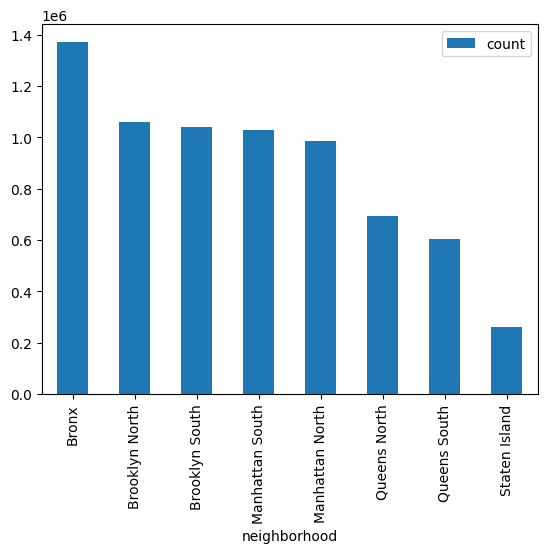

In [46]:
# Let's see the distribution of neighborhoods where most violations occured
pd.DataFrame(df['neighborhood'].value_counts()).plot(kind='bar')


<Axes: xlabel='boro_nm'>

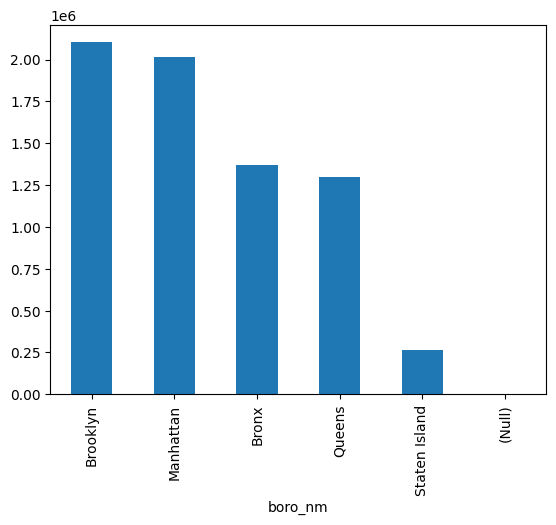

In [47]:
df[df['boro_nm'] !='null']['boro_nm'].value_counts().plot(kind='bar')

<Axes: >

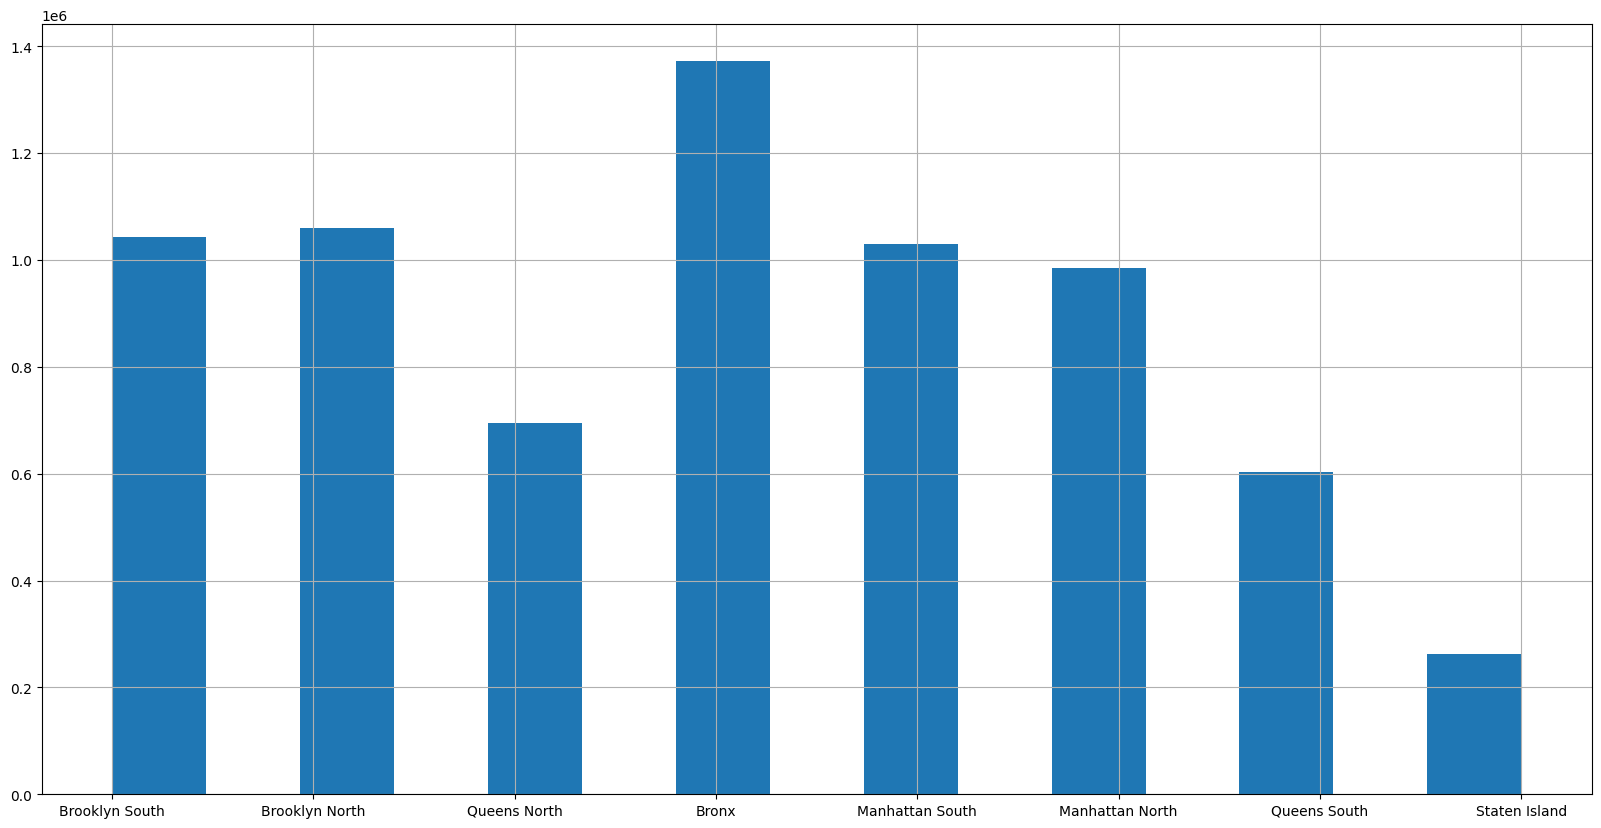

In [57]:
# Within these boroughs which neighborhood had the most call?
df['neighborhood'].hist(bins=15, figsize=(20,10))

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050127 entries, 0 to 7050126
Data columns (total 22 columns):
 #   Column              Dtype          
---  ------              -----          
 0   cad_evnt_id         int64          
 1   create_date         datetime64[ns] 
 2   incident_datetime   datetime64[ns] 
 3   incident_type       object         
 4   incident_desc       object         
 5   cip_jobs            object         
 6   neighborhood        object         
 7   boro_nm             object         
 8   incident_duration   timedelta64[ns]
 9   response_time_mins  float64        
 10  disp_ts             datetime64[ns] 
 11  arrivd_ts           datetime64[ns] 
 12  add_ts              datetime64[ns] 
 13  closng_ts           datetime64[ns] 
 14  day_of_month        int32          
 15  day_of_week         object         
 16  month               object         
 17  year                int32          
 18  geo_cd_x            int64          
 19  geo_cd_y            i

In [60]:
# Check for duplicate rows 
df.duplicated().sum()

0

In [ ]:
# Export the cleaned DataFrame to a CSV file
df.to_csv('/home/jupyter-raphrivers/Dataset/CLEANED/cleaned_df.csv', index=False)

# `index=False` means the DataFrame's index will not be written to the file.
# however if you want to include the index, you can set `index=True`.